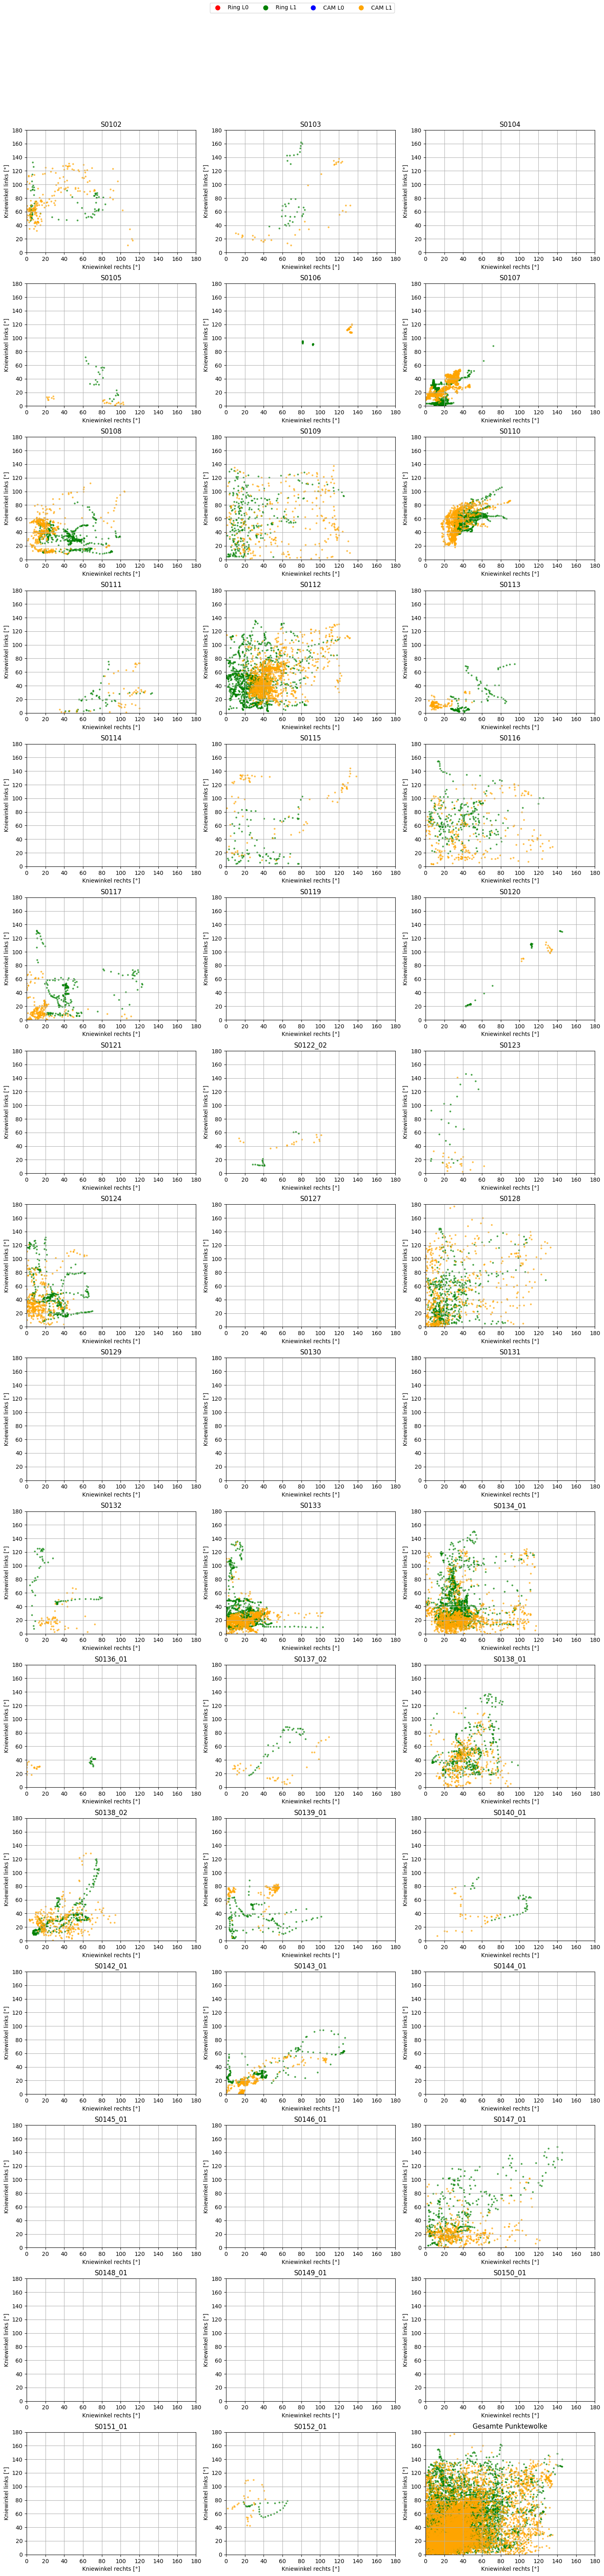

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math

# Load knee angle data
results_path_knee_angle = "../imt-main/examples/results"
ring_angles_kl = np.load(os.path.join(results_path_knee_angle, "Angles_IMU_RING_Knee_Left.npy"), allow_pickle=True)
ring_angles_kr = np.load(os.path.join(results_path_knee_angle, "Angles_IMU_RING_Knee_Right.npy"), allow_pickle=True)
cam_angles_kl = np.load(os.path.join(results_path_knee_angle, "Angles_CAM_Knee_Left.npy"), allow_pickle=True)
cam_angles_kr = np.load(os.path.join(results_path_knee_angle, "Angles_CAM_Knee_Right.npy"), allow_pickle=True)
seq_names = np.load(os.path.join(results_path_knee_angle, "Sequences_names.npy"), allow_pickle=True)

# Load labels
results_path_label = "./results"
labels_extendedLeg_R100 = np.load(os.path.join(results_path_label, "labels_extendedLeg_RING_100.npy"), allow_pickle=True)
labels_extendedLeg_cam = np.load(os.path.join(results_path_label, "labels_extendedLeg_CAM.npy"), allow_pickle=True)

# Plot setup
cols = 3
rows = math.ceil(len(ring_angles_kl) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Data for combined plot
all_ring_kr, all_ring_kl, all_ring_labels = [], [], []
all_cam_kr, all_cam_kl, all_cam_labels = [], [], []

plot_idx = 0
for i in range(len(ring_angles_kl)):
    ax = axes[plot_idx]

    # Get data
    ring_kr = ring_angles_kr[i]
    ring_kl = ring_angles_kl[i]
    cam_kr = cam_angles_kr[i]
    cam_kl = cam_angles_kl[i]
    ring_labels = labels_extendedLeg_R100[i]['behavior_label']
    cam_labels = labels_extendedLeg_cam[i]['behavior_label']

    # Split by label
    ring_kr_0 = [kr for kr, l in zip(ring_kr, ring_labels) if l == 0]
    ring_kl_0 = [kl for kl, l in zip(ring_kl, ring_labels) if l == 0]
    ring_kr_1 = [kr for kr, l in zip(ring_kr, ring_labels) if l == 1]
    ring_kl_1 = [kl for kl, l in zip(ring_kl, ring_labels) if l == 1]

    cam_kr_0 = [kr for kr, l in zip(cam_kr, cam_labels) if l == 0]
    cam_kl_0 = [kl for kl, l in zip(cam_kl, cam_labels) if l == 0]
    cam_kr_1 = [kr for kr, l in zip(cam_kr, cam_labels) if l == 1]
    cam_kl_1 = [kl for kl, l in zip(cam_kl, cam_labels) if l == 1]

    # Add to global list
    all_ring_kr.extend(ring_kr)
    all_ring_kl.extend(ring_kl)
    all_ring_labels.extend(ring_labels)

    all_cam_kr.extend(cam_kr)
    all_cam_kl.extend(cam_kl)
    all_cam_labels.extend(cam_labels)

    # Plot
    #ax.scatter(ring_kr_0, ring_kl_0, c='red', alpha=0.6, edgecolor='k', s=5, label='Ring L0')
    ax.scatter(ring_kr_1, ring_kl_1, c='green', alpha=0.6, edgecolor='green', s=5, label='Ring L1')
    #ax.scatter(cam_kr_0, cam_kl_0, c='blue', alpha=0.6, edgecolor='blue', s=5, label='CAM L0')
    ax.scatter(cam_kr_1, cam_kl_1, c='orange', alpha=0.6, edgecolor='orange', s=5, label='CAM L1')

    ax.set_title(f'{seq_names[i]}')
    ax.set_xlabel('Kniewinkel rechts [°]')
    ax.set_ylabel('Kniewinkel links [°]')
    ax.set_xlim(0, 180)
    ax.set_ylim(0, 180)
    ax.grid(True)

    plot_idx += 1

# Combined plot (letzter Subplot)
ring_kr_0 = [kr for kr, l in zip(all_ring_kr, all_ring_labels) if l == 0]
ring_kl_0 = [kl for kl, l in zip(all_ring_kl, all_ring_labels) if l == 0]
ring_kr_1 = [kr for kr, l in zip(all_ring_kr, all_ring_labels) if l == 1]
ring_kl_1 = [kl for kl, l in zip(all_ring_kl, all_ring_labels) if l == 1]

cam_kr_0 = [kr for kr, l in zip(all_cam_kr, all_cam_labels) if l == 0]
cam_kl_0 = [kl for kl, l in zip(all_cam_kl, all_cam_labels) if l == 0]
cam_kr_1 = [kr for kr, l in zip(all_cam_kr, all_cam_labels) if l == 1]
cam_kl_1 = [kl for kl, l in zip(all_cam_kl, all_cam_labels) if l == 1]

ax = axes[plot_idx]
#ax.scatter(ring_kr_0, ring_kl_0, c='red', alpha=0.6, edgecolor='red', s=5, label='Ring L0')
ax.scatter(ring_kr_1, ring_kl_1, c='green', alpha=0.6, edgecolor='green', s=5, label='Ring L1')
#ax.scatter(cam_kr_0, cam_kl_0, c='blue', alpha=0.6, edgecolor='blue', s=5, label='CAM L0')
ax.scatter(cam_kr_1, cam_kl_1, c='orange', alpha=0.6, edgecolor='orange', s=5, label='CAM L1')

ax.set_title("Gesamte Punktewolke")
ax.set_xlabel('Kniewinkel rechts [°]')
ax.set_ylabel('Kniewinkel links [°]')
ax.set_xlim(0, 180)
ax.set_ylim(0, 180)
ax.grid(True)

# Leere Achsen ausblenden
for j in range(plot_idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Gemeinsame Legende
fig.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Ring L0', markerfacecolor='red', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Ring L1', markerfacecolor='green', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='CAM L0', markerfacecolor='blue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='CAM L1', markerfacecolor='orange', markersize=10),
    ],
    loc='upper center', ncol=4
)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [5]:
print(len(ring_angles_kl[0]))
print(len(cam_angles_kl[0]))

5315
5633
